**Corrélations entre les variables pour des données brutes**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

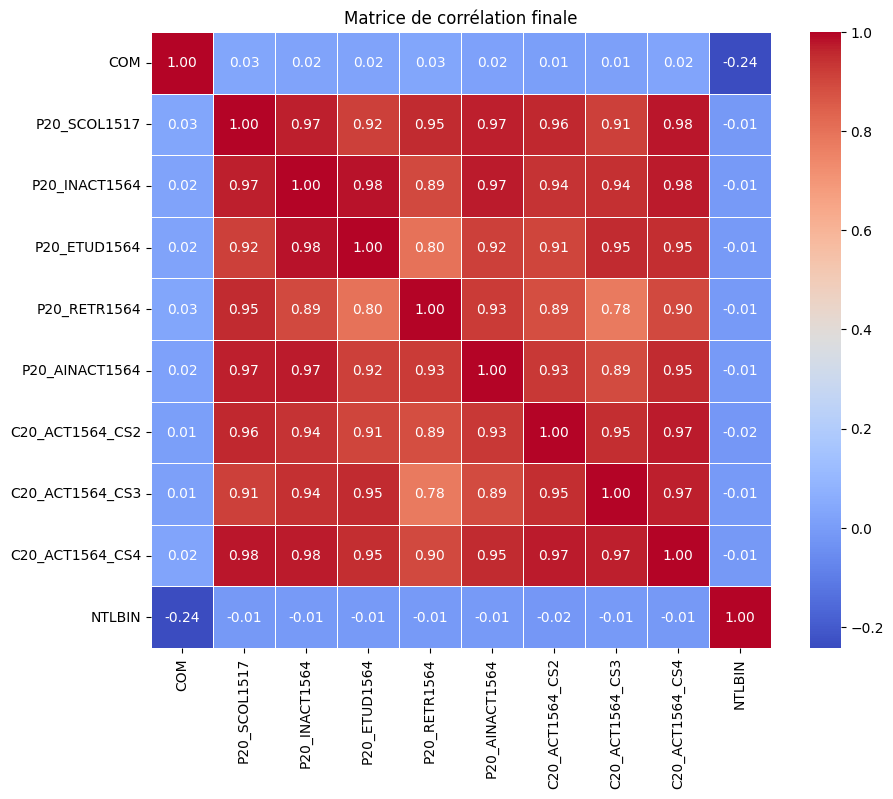

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier Excel dans un DataFrame Pandas
data0 = pd.read_excel("Table1.xlsx")
data=data0.drop('N TL',axis=1)
test2=pd.read_excel('test2.xlsx',index_col=0)

test2=test2.reset_index(drop=True)

data['NTLBIN']=test2['NTLBIN']
# Exclure les colonnes de type objet (texte)
numerical_data = data.select_dtypes(exclude=['object'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Boucle jusqu'à ce qu'il n'y ait plus de corrélations supérieures à 0.90
while True:
    # Trouver les paires de variables fortement corrélées
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr = (upper > 0.995).any()
    
    # Sortir de la boucle si aucune corrélation supérieure à 0.90 n'est trouvée
    if not high_corr.any():
        break

    # Identifier la première variable corrélée
    first_high_corr = high_corr.index[high_corr.argmax()]
    
    # Identifier les variables corrélées avec la première variable
    corr_with_first = correlation_matrix[first_high_corr][correlation_matrix[first_high_corr] > 0.5].index.tolist()

    # Supprimer une des variables corrélées
    numerical_data.drop(corr_with_first[1], axis=1, inplace=True)

    # Recalculer la matrice de corrélation
    correlation_matrix = numerical_data.corr()

# Tracer la matrice de corrélation finale avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation finale")
plt.show()


In [25]:
nombre_individus = data[data['MED20'] =='s'].shape[0]
print(nombre_individus)

229


In [27]:
data.head()

,COM,Nom Commune,P20_SCOL1517,P20_SCOL1824,ETTEF2021,P20_SCOL2529,P20_NSCOL15P_CAPBEP,P20_NSCOL15P_BAC,P20_NSCOL15P_SUP2,P20_NSCOL15P_SUP34,...,P20_INACT1564,P20_ETUD1564,P20_RETR1564,P20_AINACT1564,C20_ACT1564_CS2,C20_ACT1564_CS3,C20_ACT1564_CS4,MED20,NBPERSMENFISC20,NTLBIN
0,16001,Abzac,16,1,1,0,133,58,32,27,...,100.620543,16.267295,46.151086,38.202163,25.128929,0.000000,25.231153,17790.0,414.0,1.0
1,16002,Les Adjots,25,3,0,0,139,67,39,24,...,81.589260,26.683218,14.647133,40.258910,34.236163,9.865118,44.286133,18440.0,518.0,1.0
2,16003,Agris,34,14,0,1,227,126,59,30,...,115.236952,36.276000,48.127527,30.833425,45.350986,20.465559,80.400769,19930.0,834.0,1.0
3,16005,Aigre,36,13,7,0,428,231,93,59,...,216.673739,39.657939,93.347382,83.668418,25.562310,40.045551,111.651812,19770.0,1369.0,1.0
4,16007,Alloue,14,2,0,0,118,72,34,15,...,65.797033,14.244826,29.320650,22.231557,20.210389,5.078228,25.340139,18680.0,452.0,1.0


In [28]:
numerical_data = data.select_dtypes(exclude=['object'])
correlations = numerical_data.corr()['NTLBIN']
print(correlations)

COM                   -0.242639
P20_SCOL1517          -0.011991
P20_SCOL1824          -0.005337
ETTEF2021             -0.001526
P20_SCOL2529          -0.006055
P20_NSCOL15P_CAPBEP   -0.008350
P20_NSCOL15P_BAC      -0.009891
P20_NSCOL15P_SUP2     -0.015303
P20_NSCOL15P_SUP34    -0.010711
P20_NSCOL15P_SUP5     -0.009072
ETTEF5021             -0.002082
ETTEF1021             -0.003037
ETTEF121              -0.007007
ETTEF021              -0.015331
P20_POP1564           -0.008442
P20_ACT1564           -0.008778
P20_ACTOCC1564        -0.009631
P20_CHOMEUR1564       -0.003301
P20_CHOM_DIPLMIN       0.003634
P20_CHOM_SUP34        -0.006216
P20_CHOM_SUP5         -0.005011
P20_ACT_DIPLMIN       -0.003194
P20_ACT_SUP34         -0.009385
P20_ACT_SUP5          -0.007962
P20_INACT1564         -0.007517
P20_ETUD1564          -0.007812
P20_RETR1564          -0.008338
P20_AINACT1564        -0.005449
C20_ACT1564_CS2       -0.018553
C20_ACT1564_CS3       -0.009398
C20_ACT1564_CS4       -0.011436
MED20   

In [ ]:
data['MED20'] = pd.to_numeric(data['MED20'], errors='coerce')
data['NBPERSMENFISC20'] = pd.to_numeric(data['NBPERSMENFISC20'], errors='coerce')


In [44]:
test2=pd.read_excel('test2.xlsx',index_col=0)
df=test2[['SumOfNB_EQUIP','COM']]
datafin = pd.merge(data, df, on='COM', how='left')

In [48]:
median_values = datafin.select_dtypes(include=np.number).median()


datafin.fillna(median_values, inplace=True)

In [43]:

test2.reset_index(inplace=True)
test2.head()


,COM,Nom Commune,P20_POP0205,NTLBIN,SumOfNB_EQUIP,N TL
0,33063,Bordeaux,9504,1,194,46
1,86194,Poitiers,3473,1,141,13
2,64102,Bayonne,1919,1,93,11
3,17300,Rochelle,2499,1,155,8
4,87085,Limoges,5116,1,236,6


In [4]:
data0 = pd.read_excel("Table1.xlsx")

**Corrélations entre les variables pour des données 'proportion'**

In [56]:
#Construction de mes données
data0 = pd.read_excel("Table1.xlsx")
data=pd.read_csv('votre_fichier_normalise.csv',index_col=0)
data=data.drop('P20_POP1564',axis=1)

columns_to_update = [col for col in data.columns if col.startswith('ETTEF')]

for col in columns_to_update:
    data = data.drop(col, axis=1)

data0 = data0.reset_index(drop=True)
data = data.reset_index(drop=True)

data['P20_POP1564']=data0['P20_POP1564']

for col in columns_to_update:
    data[col] = data0[col]

data=data.drop('N TL',axis=1)
test2=pd.read_excel('test2.xlsx',index_col=0)

test2=test2.reset_index(drop=True)

data['NTLBIN']=test2['NTLBIN']

# Exclure les colonnes de type objet (texte)
numerical_data = data.select_dtypes(exclude=['object'])
correlations = numerical_data.corr()['NTLBIN']
print(correlations)

   

P20_SCOL1517          -0.044675
P20_SCOL1824          -0.011373
P20_SCOL2529          -0.000903
P20_NSCOL15P_CAPBEP    0.054511
P20_NSCOL15P_BAC       0.026025
P20_NSCOL15P_SUP2     -0.117852
P20_NSCOL15P_SUP34    -0.060295
P20_NSCOL15P_SUP5     -0.067899
P20_ACT1564           -0.031356
P20_ACTOCC1564        -0.032090
P20_CHOMEUR1564        0.012834
P20_CHOM_DIPLMIN       0.050343
P20_CHOM_SUP34        -0.037454
P20_CHOM_SUP5         -0.030552
P20_ACT_DIPLMIN        0.055629
P20_ACT_SUP34         -0.077608
P20_ACT_SUP5          -0.085469
P20_INACT1564          0.031356
P20_ETUD1564          -0.048936
P20_RETR1564           0.064666
P20_AINACT1564         0.014272
C20_ACT1564_CS2       -0.034067
C20_ACT1564_CS3       -0.054744
C20_ACT1564_CS4       -0.051644
P20_POP1564           -0.008442
ETTEF2021             -0.001526
ETTEF5021             -0.002082
ETTEF1021             -0.003037
ETTEF121              -0.007007
ETTEF021              -0.015331
NTLBIN                 1.000000
Name: NT

In [57]:
data0 = pd.read_excel("Table1.xlsx")


In [15]:
threshold = 0.05  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à 0.05 :
P20_NSCOL15P_CAPBEP    0.054511
P20_NSCOL15P_SUP2     -0.117852
P20_NSCOL15P_SUP34    -0.060295
P20_NSCOL15P_SUP5     -0.067899
P20_CHOM_DIPLMIN       0.050343
P20_ACT_DIPLMIN        0.055629
P20_ACT_SUP34         -0.077608
P20_ACT_SUP5          -0.085469
P20_RETR1564           0.064666
C20_ACT1564_CS3       -0.054744
C20_ACT1564_CS4       -0.051644
NTLBIN                 1.000000
Name: NTLBIN, dtype: float64


In [51]:
datafin.head()

,COM,Nom Commune,P20_SCOL1517,P20_SCOL1824,ETTEF2021,P20_SCOL2529,P20_NSCOL15P_CAPBEP,P20_NSCOL15P_BAC,P20_NSCOL15P_SUP2,P20_NSCOL15P_SUP34,...,P20_RETR1564,P20_AINACT1564,C20_ACT1564_CS2,C20_ACT1564_CS3,C20_ACT1564_CS4,MED20,NBPERSMENFISC20,NTLBIN,SumOfNB_EQUIP,N TL
0,16001,Abzac,16,1,1,0,133,58,32,27,...,46.151086,38.202163,25.128929,0.000000,25.231153,17790.0,414.0,1.0,4.0,46.0
1,16002,Les Adjots,25,3,0,0,139,67,39,24,...,14.647133,40.258910,34.236163,9.865118,44.286133,18440.0,518.0,1.0,2.0,13.0
2,16003,Agris,34,14,0,1,227,126,59,30,...,48.127527,30.833425,45.350986,20.465559,80.400769,19930.0,834.0,1.0,4.0,11.0
3,16005,Aigre,36,13,7,0,428,231,93,59,...,93.347382,83.668418,25.562310,40.045551,111.651812,19770.0,1369.0,1.0,6.0,8.0
4,16007,Alloue,14,2,0,0,118,72,34,15,...,29.320650,22.231557,20.210389,5.078228,25.340139,18680.0,452.0,1.0,6.0,6.0


In [52]:
#test2=pd.read_excel('test2.xlsx',index_col=0)
#data['NTLBIN']=test2['NTLBIN']
datafin.to_csv('datafinbrutes.csv',index=False)

In [59]:
test2=test2.reset_index(drop=True)
df=test2[['SumOfNB_EQUIP','COM']]
datafin = pd.merge(data0, df, on='COM', how='left')

KeyError: "['COM'] not in index"

In [65]:
data=pd.read_excel('Table1.xlsx',engine='openpyxl')
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)
data.head()

,COM,Nom Commune,N TL,P20_SCOL1517,P20_SCOL1824,ETTEF2021,P20_SCOL2529,P20_NSCOL15P_CAPBEP,P20_NSCOL15P_BAC,P20_NSCOL15P_SUP2,...,P20_INACT1564,P20_ETUD1564,P20_RETR1564,P20_AINACT1564,C20_ACT1564_CS2,C20_ACT1564_CS3,C20_ACT1564_CS4,MED20,NBPERSMENFISC20,NTLBIN
0,16001,Abzac,0,16,1,1,0,133,58,32,...,100.620543,16.267295,46.151086,38.202163,25.128929,0.000000,25.231153,17790,414,0
1,16002,Les Adjots,0,25,3,0,0,139,67,39,...,81.589260,26.683218,14.647133,40.258910,34.236163,9.865118,44.286133,18440,518,0
2,16003,Agris,0,34,14,0,1,227,126,59,...,115.236952,36.276000,48.127527,30.833425,45.350986,20.465559,80.400769,19930,834,0
3,16005,Aigre,0,36,13,7,0,428,231,93,...,216.673739,39.657939,93.347382,83.668418,25.562310,40.045551,111.651812,19770,1369,0
4,16007,Alloue,0,14,2,0,0,118,72,34,...,65.797033,14.244826,29.320650,22.231557,20.210389,5.078228,25.340139,18680,452,0


In [66]:
data['MED20'] = pd.to_numeric(data['MED20'], errors='coerce')
data['NBPERSMENFISC20'] = pd.to_numeric(data['NBPERSMENFISC20'], errors='coerce')


In [68]:
test2=pd.read_excel('test2.xlsx',engine='openpyxl')
df=test2[['SumOfNB_EQUIP','COM']]
datafin = pd.merge(data, df, on='COM', how='left')

In [70]:
datafin.to_csv('datafinbrutes.csv',index=False)